# Data augmentation and normalization

In [ ]:
import tensorflow as tf
from IPython.display import HTML

### Import data into tensorflow dataset object

In [3]:
train_dir = 'datasetX/trainX'
valid_dir = 'datasetX/validX'
test_dir = 'datasetX/testX'

### Data Augmentation and Normalization

In [4]:
from PIL import Image
import os

In [5]:
# Define image dimensions and batch size
image_size = (299, 299)
batch_size = 32
CHANNELS = 3

In [6]:
# Data augmentation and preprocessing for the training and validation set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2, # Randomly zooms the images by 20%
    shear_range=0.2, # Applies shear transformation with a shear angle of 20 degrees
    width_shift_range=0.1, # Randomly shifts the images horizontally by 10% of the width
    height_shift_range=0.1,  # Randomly shifts the images vertically by 10% of the height
    brightness_range=[0.8, 1.2],  # Randomly adjusts brightness by a factor between 0.8 and 1.2
    contrast_range=[0.8, 1.2]  # Randomly adjusts contrast by a factor between 0.8 and 1.2
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2], 
    contrast_range=[0.8, 1.2]  
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 13626 images belonging to 56 classes.
Found 1667 images belonging to 56 classes.


In [ ]:
train_generator.class_indices

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

In [11]:
import scipy

In [12]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break
    #     print(label_batch)
    # print(image_batch[0])
#     count+=1
#     if count>2:
#         break

(32, 299, 299, 3)


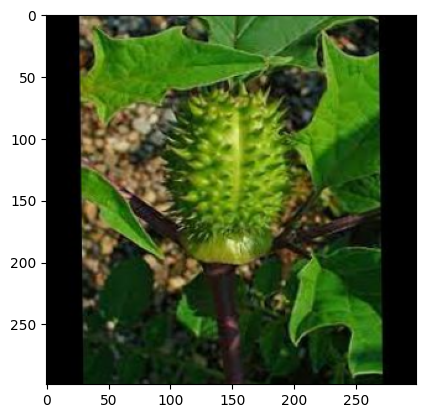

In [14]:
count = 0
for image_batch, label_batch in train_generator:
    plt.imshow(image_batch[0])
    plt.show()
    break

In [ ]:
# Data augmentation and preprocessing for the test set

test_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      horizontal_flip=True,
      zoom_range=0.2,
      shear_range=0.2,
      width_shift_range=0.1,
      height_shift_range=0.1
      brightness_range=[0.8, 1.2], 
      contrast_range=[0.8, 1.2] 

)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode= 'categorical'
)